In [24]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

from PIL import ImageFile

In [25]:
pathTrain = "C:\\Users\\Rishav\\Desktop\\projects\\dataset_pbl\\train"
pathVal = "C:\\Users\\Rishav\\Desktop\\projects\\dataset_pbl\\valid"
pathTest = "C:\\Users\\Rishav\\Desktop\\projects\\dataset_pbl\\test"

<h3>Preprocessing</h3>

In [26]:
trainDatagen = ImageDataGenerator(rescale=1./255)
testDatagen = ImageDataGenerator(rescale=1./255)
validationDatagen = ImageDataGenerator(rescale=1./255)

In [27]:
#Target size chosen arbitrarily along with batch size
trainIter = trainDatagen.flow_from_directory(
    pathTrain,
    target_size=(256, 256),
    batch_size=16
)

Found 30250 images belonging to 2 classes.


In [28]:
testIter = testDatagen.flow_from_directory(
    pathTest,
    target_size=(256, 256),
    batch_size=16
)

Found 6300 images belonging to 2 classes.


In [29]:
validIter = validationDatagen.flow_from_directory(
    pathVal,
    target_size=(256, 256),
    batch_size=16
)

Found 6300 images belonging to 2 classes.


In [30]:
#the elements in each category
from collections import Counter
counter = Counter(trainIter.classes)
print(counter.items())

dict_items([(0, 14500), (1, 15750)])


In [31]:
print(trainIter.class_indices)

{'nowildfire': 0, 'wildfire': 1}


<h3>Modeling</h3>

Using first a simple CNN Model

In [19]:
# Dimensions of our images.
img_width, img_height = 256, 256 
input_shape = (img_width, img_height, 3) # each image has 3 channels

# Epochs
epochsAmt = 10

# Number of images to read every iteration 
batch_size = 64

# Total number of images for training and testing
train_num = 30250 
test_num = 6300 
valid_num = 6300 

# Total number of steps in each epoch
train_steps = train_num // batch_size # integer division
test_steps  = test_num  // batch_size 

# Total number of classes
num_classes = 2

In [20]:
model = keras.Sequential(name = 'Wildfire-CNN')

model.add(layers.Conv2D(8, kernel_size = (3,3),activation = 'relu', input_shape = input_shape))

model.add(layers.Conv2D(16, kernel_size = (3,3),activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(32,activation = 'relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(2,activation = 'softmax'))

model.summary()

e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "Wildfire-CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     8,128,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,130,002 (31.01 MB)

 Trainable params: 8,130,002 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = history = model.fit(trainIter,
                    batch_size=batch_size,
                    epochs=epochsAmt,
                    validation_data=(validIter),
                    steps_per_epoch = train_steps,
                    validation_steps = test_steps)

Epoch 1/10


e:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


472/472 ━━━━━━━━━━━━━━━━━━━━ 160s 331ms/step - accuracy: 0.5212 - loss: 0.8091 - val_accuracy: 0.5434 - val_loss: 0.6916
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 154s 327ms/step - accuracy: 0.5275 - loss: 0.6922 - val_accuracy: 0.5459 - val_loss: 0.6908
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 142s 300ms/step - accuracy: 0.5187 - loss: 0.6925 - val_accuracy: 0.5421 - val_loss: 0.6902
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 126s 267ms/step - accuracy: 0.5154 - loss: 0.6929 - val_accuracy: 0.5689 - val_loss: 0.6890
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4580 - loss: 0.5235 - val_accuracy: 0.5357 - val_loss: 0.4611
Epoch 6/10


e:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


472/472 ━━━━━━━━━━━━━━━━━━━━ 107s 226ms/step - accuracy: 0.5146 - loss: 0.6928 - val_accuracy: 0.5446 - val_loss: 0.6900
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 106s 225ms/step - accuracy: 0.5261 - loss: 0.6919 - val_accuracy: 0.5306 - val_loss: 0.6915
Epoch 8/10
 93/472 ━━━━━━━━━━━━━━━━━━━━ 1:16 203ms/step - accuracy: 0.5242 - loss: 0.6921

KeyboardInterrupt: 

In [ ]:
result = model.evaluate(testIter)

394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.9640 - loss: 0.1235


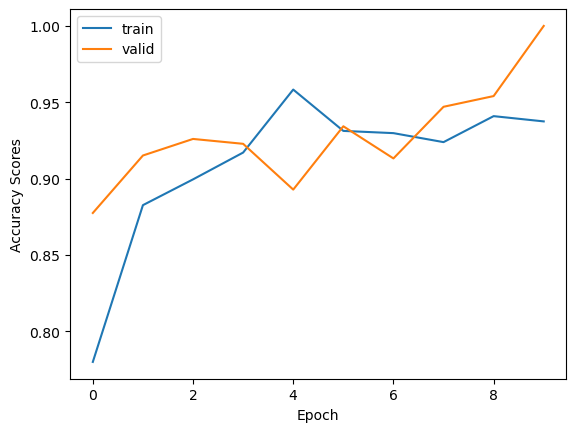

In [ ]:
plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'valid')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Scores')

plt.show()

In [4]:
!pip install SomeLibrary

ERROR: Could not find a version that satisfies the requirement SomeLibrary (from versions: none)
ERROR: No matching distribution found for SomeLibrary


In [10]:
y_pred

NameError: name 'y_pred' is not defined

VGG MODEL

In [33]:
from keras import layers
from keras import models

# Dimensions of our images.
img_width, img_height = 256, 256 
input_shape = (img_width, img_height, 3) # each image has 3 channels

# Number of classes
num_classes = 2

# Instantiate a Sequential model
model_vgg = models.Sequential(name='VGG-style')

# Block 1
model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model_vgg.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Classifier Head
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(4096, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(4096, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(num_classes, activation='softmax'))

model_vgg.summary()


e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "VGG-style"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,726,018 (632.19 MB)

 Trainable params: 165,726,018 (632.19 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from keras import optimizers
# Define optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Epochs
epochsAmt = 5

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Enable loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_iter = train_datagen.flow_from_directory(
    pathTrain,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

valid_iter = test_datagen.flow_from_directory(
    pathVal,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
history = model_vgg.fit(
    train_iter,
    batch_size=batch_size,
    epochs=epochsAmt,
    validation_data=valid_iter,
    steps_per_epoch=train_steps,
    validation_steps=test_steps)


Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Epoch 1/5
 13/472 ━━━━━━━━━━━━━━━━━━━━ 2:10:09 17s/step - accuracy: 0.4832 - loss: 0.6945

KeyboardInterrupt: 